In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# Read data
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [3]:
# Find categorical and numerical data
cats = []
for col in df_train.columns.values:
    if df_train[col].dtype == "object":
        cats.append(col)
df_cat = df_train[cats]
df_num = df_train.drop(cats, 1)

In [4]:
df_cat.columns

Index([u'MSZoning', u'Street', u'Alley', u'LotShape', u'LandContour',
       u'Utilities', u'LotConfig', u'LandSlope', u'Neighborhood',
       u'Condition1', u'Condition2', u'BldgType', u'HouseStyle', u'RoofStyle',
       u'RoofMatl', u'Exterior1st', u'Exterior2nd', u'MasVnrType',
       u'ExterQual', u'ExterCond', u'Foundation', u'BsmtQual', u'BsmtCond',
       u'BsmtExposure', u'BsmtFinType1', u'BsmtFinType2', u'Heating',
       u'HeatingQC', u'CentralAir', u'Electrical', u'KitchenQual',
       u'Functional', u'FireplaceQu', u'GarageType', u'GarageFinish',
       u'GarageQual', u'GarageCond', u'PavedDrive', u'PoolQC', u'Fence',
       u'MiscFeature', u'SaleType', u'SaleCondition'],
      dtype='object')

In [5]:
df_num.columns

Index([u'Id', u'MSSubClass', u'LotFrontage', u'LotArea', u'OverallQual',
       u'OverallCond', u'YearBuilt', u'YearRemodAdd', u'MasVnrArea',
       u'BsmtFinSF1', u'BsmtFinSF2', u'BsmtUnfSF', u'TotalBsmtSF', u'1stFlrSF',
       u'2ndFlrSF', u'LowQualFinSF', u'GrLivArea', u'BsmtFullBath',
       u'BsmtHalfBath', u'FullBath', u'HalfBath', u'BedroomAbvGr',
       u'KitchenAbvGr', u'TotRmsAbvGrd', u'Fireplaces', u'GarageYrBlt',
       u'GarageCars', u'GarageArea', u'WoodDeckSF', u'OpenPorchSF',
       u'EnclosedPorch', u'3SsnPorch', u'ScreenPorch', u'PoolArea', u'MiscVal',
       u'MoSold', u'YrSold', u'SalePrice'],
      dtype='object')

In [6]:
# Log transform for numerical data
for col in df_train.columns.values:
    if df_train[col].dtype != "object":
        df_train[col] = np.log(df_train[col])

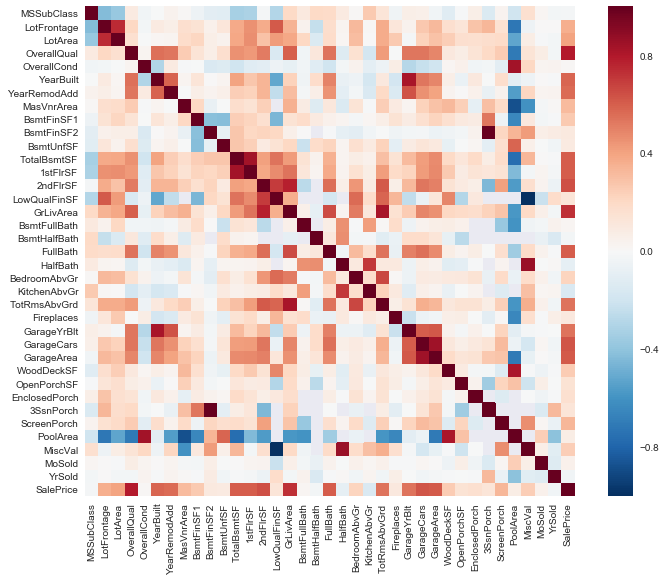

In [12]:
# Find the correlation matrix
corrmat = df_train.drop('Id', 1).corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=1, square=True)

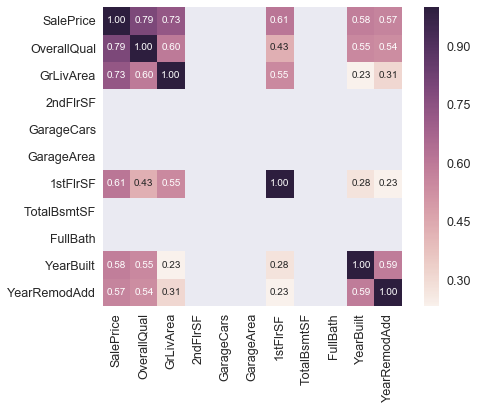

In [30]:
#saleprice correlation matrix
k = 11 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [31]:
# Use most important 15 numerical factor as numerical data
df_num = df_train[cols]

In [32]:
# Check if there is missing data in the numerical data
total = df_num.isnull().sum().sort_values(ascending=False)
percent = (df_num.isnull().sum()/df_num.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data # Not missing data

,Total,Percent
YearRemodAdd,0,0.0
YearBuilt,0,0.0
FullBath,0,0.0
TotalBsmtSF,0,0.0
1stFlrSF,0,0.0
GarageArea,0,0.0
GarageCars,0,0.0
2ndFlrSF,0,0.0
GrLivArea,0,0.0
OverallQual,0,0.0


In [33]:
cats

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [34]:
df_cat = df_train[cats]
# Missing data for categorical ones
total = df_cat.isnull().sum().sort_values(ascending=False)
percent = (df_cat.isnull().sum()/df_cat.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
GarageCond,81,0.055479
GarageQual,81,0.055479
GarageFinish,81,0.055479
GarageType,81,0.055479
BsmtFinType2,38,0.026027


In [35]:
# Delete the categorical data with more than 50 missing data
df_cat = df_cat.drop((missing_data[missing_data['Total']>50]).index, 1)

In [37]:
# Replace the missing categorical data with "MISS"
for col in df_cat.columns.values:
    if df_cat[col].isnull().sum() > 0:
        df_cat[col] = df_cat[col].fillna('MISS')

In [38]:
# Covert categorical data into dummies
df_cat = pd.get_dummies(df_cat)

In [39]:
df_cat.columns

Index([u'MSZoning_C (all)', u'MSZoning_FV', u'MSZoning_RH', u'MSZoning_RL',
       u'MSZoning_RM', u'Street_Grvl', u'Street_Pave', u'LotShape_IR1',
       u'LotShape_IR2', u'LotShape_IR3',
       ...
       u'SaleType_ConLw', u'SaleType_New', u'SaleType_Oth', u'SaleType_WD',
       u'SaleCondition_Abnorml', u'SaleCondition_AdjLand',
       u'SaleCondition_Alloca', u'SaleCondition_Family',
       u'SaleCondition_Normal', u'SaleCondition_Partial'],
      dtype='object', length=222)

In [42]:
# Create new training data
df_train = df_num.join(df_cat)

In [49]:
# Create new column "IsRemod", if True 1, else 0
df_train['IsRemod'] = 1 * np.array(df_train['YearRemodAdd'] != df_train['YearBuilt'])

In [51]:
df_train.columns

Index([u'SalePrice', u'OverallQual', u'GrLivArea', u'2ndFlrSF', u'GarageCars',
       u'GarageArea', u'1stFlrSF', u'TotalBsmtSF', u'FullBath', u'YearBuilt',
       ...
       u'SaleType_New', u'SaleType_Oth', u'SaleType_WD',
       u'SaleCondition_Abnorml', u'SaleCondition_AdjLand',
       u'SaleCondition_Alloca', u'SaleCondition_Family',
       u'SaleCondition_Normal', u'SaleCondition_Partial', u'IsRemod'],
      dtype='object', length=234)

In [77]:
# Deal with infinite number, replace them with -999
for col in df_train.columns.values:
    if np.any(np.isfinite(df_train[col])):
        for i in range(1460):
            if not np.isfinite(df_train[col][i]):
                df_train[col][i] = -999

In [79]:
np.all(np.isfinite(df_train))

True

In [82]:
y_train = df_train['SalePrice']
X_train = df_train.drop('SalePrice', 1)

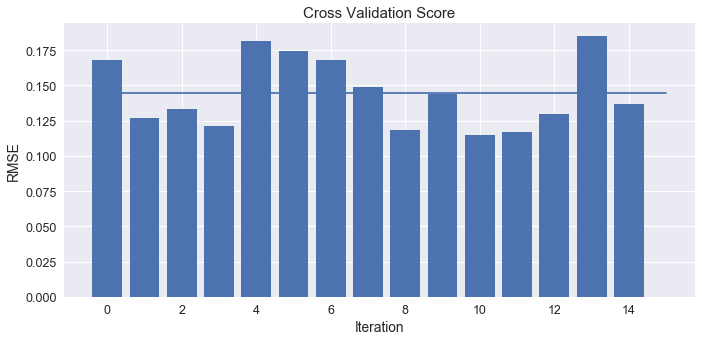

In [83]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Normalizer
from sklearn.cross_validation import cross_val_score
from sklearn.preprocessing import Imputer
from sklearn.metrics import make_scorer, mean_squared_error
scorer = make_scorer(mean_squared_error, False)

clf = RandomForestRegressor(n_estimators=500, n_jobs=-1)
cv_score = np.sqrt(-cross_val_score(estimator=clf, X=X_train, y=y_train, cv=15, scoring = scorer))

plt.figure(figsize=(10,5))
plt.bar(range(len(cv_score)), cv_score)
plt.title('Cross Validation Score')
plt.ylabel('RMSE')
plt.xlabel('Iteration')

plt.plot(range(len(cv_score) + 1), [cv_score.mean()] * (len(cv_score) + 1))
plt.tight_layout()

In [85]:
# Train the random forest using all data
my_clf = RandomForestRegressor(n_estimators=500, n_jobs=-1)
my_clf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=500, n_jobs=-1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [86]:
# Preprocess test data
for col in df_test.columns.values:
    if df_test[col].dtype != "object":
        df_test[col] = np.log(df_test[col])

In [91]:
cols = cols.drop("SalePrice")

In [92]:
df_num = df_test[cols]

In [93]:
df_cat = df_test[cats]
# Delete the categorical data with more than 50 missing data
df_cat = df_cat.drop((missing_data[missing_data['Total']>50]).index, 1)
# Replace the missing categorical data with "MISS"
for col in df_cat.columns.values:
    if df_cat[col].isnull().sum() > 0:
        df_cat[col] = df_cat[col].fillna('MISS')
# Covert categorical data into dummies
df_cat = pd.get_dummies(df_cat)

In [94]:
df_cat.columns

Index([u'MSZoning_C (all)', u'MSZoning_FV', u'MSZoning_MISS', u'MSZoning_RH',
       u'MSZoning_RL', u'MSZoning_RM', u'Street_Grvl', u'Street_Pave',
       u'LotShape_IR1', u'LotShape_IR2',
       ...
       u'SaleType_MISS', u'SaleType_New', u'SaleType_Oth', u'SaleType_WD',
       u'SaleCondition_Abnorml', u'SaleCondition_AdjLand',
       u'SaleCondition_Alloca', u'SaleCondition_Family',
       u'SaleCondition_Normal', u'SaleCondition_Partial'],
      dtype='object', length=213)